In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy.io as io
import copy
from PIL import Image, ImageOps

In [5]:
rpjb_list = glob.glob("../../../data/2023_imagery/filtered/085_SPKMVLFLP/*")

In [6]:
example_rpjb = rpjb_list[0]
example_rpjb

IndexError: list index out of range

# Goal: Create a function that takes in the pixels of an image as a numpy array and returns that same numpy array thats the shape we want(1488x336). 

### To get the image to fit these dimensions, we will add a buffer to the image. The buffer pixels will contan the median pixel value of the image. 

In [ ]:
# Read in the image
pic = Image.open(example_rpjb)
pic = ImageOps.grayscale(pic)
pixel_values = np.array(pic)
pixel_values.shape

(427, 1488)

In [ ]:
med = np.median(pixel_values.flatten())
med

133.0

In [ ]:
pixel_values.shape

(427, 1488)

In [ ]:
propper_size = np.empty((336,1488))
propper_size.shape

(336, 1488)

In [ ]:
len(propper_size)

336

In [ ]:
old_y, old_x = pixel_values.shape

# These propper values are reliant on the cropping alrogithm. That means I'll need to change these later. 
propper_x = 1488
propper_y = 336

act_x = 0
act_y = 0

if propper_y >= old_y:
    act_y = propper_y
else:
    act_y = old_y

if propper_x >= old_x:
    act_x = propper_x
else:
    act_x = old_x

In [ ]:
biggest_dems = np.empty((act_y, act_x))
biggest_dems.fill(med)
biggest_dems.shape

(427, 1488)

In [ ]:
biggest_dems[:pixel_values.shape[0],:pixel_values.shape[1]] = pixel_values

In [ ]:
biggest_dems

array([[110., 100.,  97., ..., 131., 124., 111.],
       [130., 113., 104., ..., 121., 117., 115.],
       [117., 130., 137., ..., 156., 131.,  95.],
       ...,
       [109., 123., 131., ..., 147., 140., 133.],
       [111., 116., 119., ..., 143., 138., 136.],
       [120., 104.,  94., ..., 138., 138., 141.]])

In [ ]:
pixel_values = biggest_dems[:propper_y, :propper_x]

In [ ]:
def buffer_image(pixel_values, propper_x, propper_y):
    med = np.median(pixel_values.flatten())
    old_y, old_x = pixel_values.shape

    # These propper values are reliant on the cropping alrogithm. That means I'll need to change these later. 

    act_x = 0
    act_y = 0

    if propper_y >= old_y:
        act_y = propper_y
    else:
        act_y = old_y

    if propper_x >= old_x:
        act_x = propper_x
    else:
        act_x = old_x
    
    biggest_dems = np.empty((act_y, act_x))
    biggest_dems.fill(med)

    biggest_dems[:pixel_values.shape[0],:pixel_values.shape[1]] = pixel_values

    pixel_values = biggest_dems[:propper_y, :propper_x]
    
    
    return pixel_values

# Testing the method

../../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630641951.png


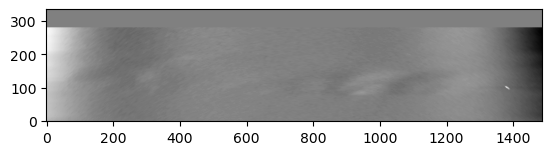

../../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630637151.png


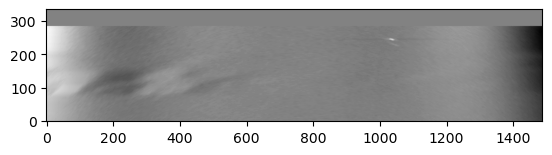

../../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630646151.png


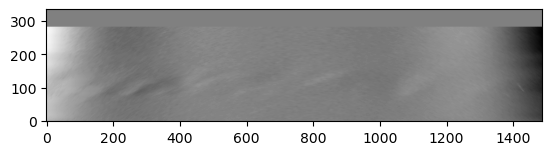

In [ ]:
# works, only fails when an image is labled as bad. I will change this by fixing the cropping method
png_list = glob.glob("../../data/2023_imagery/filtered/117_SPKMVLFHP_005/*.png")

pixel_values = []

for item in png_list[:3]:
    print(item)
    pic = Image.open(item)
    pic = ImageOps.grayscale(pic)
    pixel_values = np.array(pic)


    pixel_values = buffer_image(pixel_values)


    plt.imshow(pixel_values, cmap='gray', origin='lower')
    plt.show()

['../../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630641951.png', '../../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630637151.png', '../../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630646151.png']
(336, 1488)
(336, 1488)
(336, 1488)


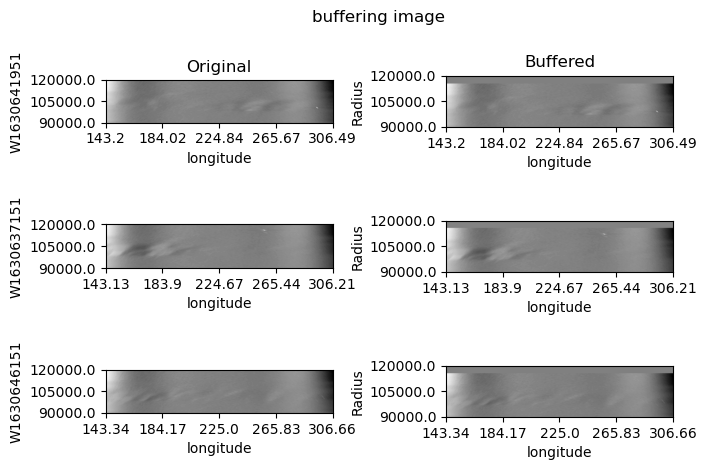

In [ ]:
import sys
sys.path.insert(1, '../../../spokes_gridtools/Research2022/spokes/src')
from spoketools import label_figure

path_list = png_list[:3]

print(path_list)

fig, axs = plt.subplots(3, 2)
fig.suptitle('buffering image')
fig.tight_layout()
fig.subplots_adjust(wspace=.5)


for filtered_image_unbuffered in path_list:
    pic = Image.open(filtered_image_unbuffered)
    pic = ImageOps.grayscale(pic)
    pixel_values = np.array(pic)

    opus_id = filtered_image_unbuffered.split('/')[-1].split('.')[0]
    idl_path = glob.glob(f"../../data/2023_rpjb/good/117_SPKMVLFHP_005/{opus_id}*")
    idl = io.readsav(idl_path[0])


    #original
    label_figure(idl, pixel_values, axs[path_list.index(filtered_image_unbuffered), 0])

    pixel_values = buffer_image(pixel_values)
    print(pixel_values.shape)

    #Cosmic Rays Removed 
    label_figure(idl, pixel_values, axs[path_list.index(filtered_image_unbuffered), 1])


axs[0, 0].set(ylabel='W1630641951')
axs[1, 0].set(ylabel='W1630637151')
axs[2, 0].set(ylabel='W1630646151')



axs[0,0].set_title('Original')
axs[0,1].set_title('Buffered')


plt.show()